In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time

In [2]:
X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8 ],
              [8, 8],
              [1, 0.6],
              [9,11]])
print(X)

[[  1.    2. ]
 [  1.5   1.8]
 [  5.    8. ]
 [  8.    8. ]
 [  1.    0.6]
 [  9.   11. ]]


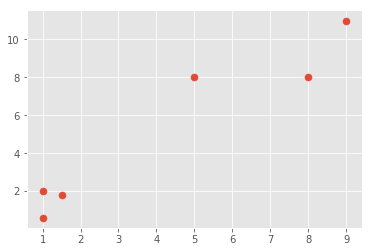

In [3]:
plt.scatter(X[:,0], X[:,1], s=50)
plt.show()

In [4]:
colors = 10*["g","r","c","b","k"]

In [5]:
f= [1,2,3,0]
v=f.index(min(f))
print(v)

3


In [6]:
dpa = []
dpb =[]
class K_Means:
    fig = plt.figure()
    ax1 = fig.add_subplot(1,1,1)
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):
        #centroid dict
        self.centroids = {}
        # since k=2 we will select first two points from the data and we will declare that as a centroid
        for i in range(self.k):
            self.centroids[i] = data[i]
        
        # we will run this loop for 300 times (300 iteration)
        for i in range(self.max_iter):
            self.classifications = {}  #{0: [], 1: []}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:  #finding distance from centroid , finding mini value , putting them in classification
                distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in 
                                                                                    self.centroids]
                classification = distances.index(min(distances)) #find the index of the min distance

                self.classifications[classification].append(featureset)
    

            prev_centroids = dict(self.centroids)
            print(prev_centroids)
            dpa.append(self.centroids[0])
            dpb.append(self.centroids[1])
            print(dpa)
            print(dpb)
          
            for classification in self.classifications:

                self.centroids[classification] = np.average(self.classifications[classification],axis=0)
                #print(self.centroids)
            optimized = True
            #def animate(i):
                #xar = centroids[centroid][0]
                #yar = centroids[centroid][1]
                #x1.clear()
                #ax1.plot(xar,yar)
                
            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    optimized = False
            
            
            
            if optimized:
                break
                
            
    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification


In [15]:
clf = K_Means(k=3)
clf.fit(X)

{0: array([ 1.,  2.]), 1: array([ 1.5,  1.8]), 2: array([ 5.,  8.])}
[array([ 1.,  2.]), array([ 1.,  2.]), array([ 1.16666667,  1.46666667]), array([ 1.,  2.])]
[array([ 1.5,  1.8]), array([ 4.9 ,  5.88]), array([ 7.33333333,  9.        ]), array([ 1.5,  1.8])]
{0: array([ 1.,  2.]), 1: array([ 1.25,  1.2 ]), 2: array([ 7.33333333,  9.        ])}
[array([ 1.,  2.]), array([ 1.,  2.]), array([ 1.16666667,  1.46666667]), array([ 1.,  2.]), array([ 1.,  2.])]
[array([ 1.5,  1.8]), array([ 4.9 ,  5.88]), array([ 7.33333333,  9.        ]), array([ 1.5,  1.8]), array([ 1.25,  1.2 ])]
{0: array([ 1.25,  1.9 ]), 1: array([ 1. ,  0.6]), 2: array([ 7.33333333,  9.        ])}
[array([ 1.,  2.]), array([ 1.,  2.]), array([ 1.16666667,  1.46666667]), array([ 1.,  2.]), array([ 1.,  2.]), array([ 1.25,  1.9 ])]
[array([ 1.5,  1.8]), array([ 4.9 ,  5.88]), array([ 7.33333333,  9.        ]), array([ 1.5,  1.8]), array([ 1.25,  1.2 ]), array([ 1. ,  0.6])]


In [16]:
for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="o", color="k", s=50, linewidths=1)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=50, linewidths=1)


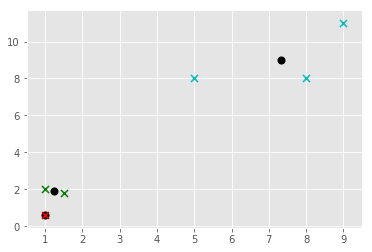

In [17]:
plt.show()

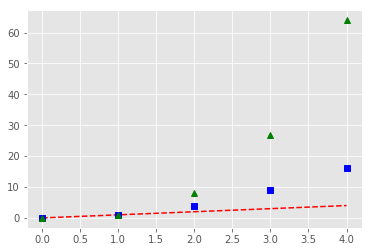

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 1)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

In [19]:
Y = [9,7]

In [20]:
clf.predict(Y)

2

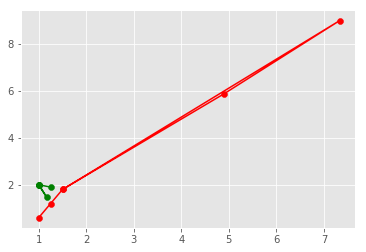

In [21]:
from collections import defaultdict
e=defaultdict(list)

#plt.plot(dpa[:,0], dpa[:,1])
#plt.plot(dpb[:,0], dpb[:,1])
a=[]
b=[]
for i in range(len(dpa)):
    a.append(dpa[i])
for i in range(len(dpb)):
    b.append(dpb[i])
#print(len(dpa))
#print(a)
#print('-----------------')
#print(b)

e = np.array(b)
#print(e)
#print('-----------------')

f = np.array(a)
#print(f)


plt.scatter(e[:,0],e[:,1], color='red')
plt.scatter(f[:,0],f[:,1], color='green')
plt.plot(e[:,0],e[:,1], color='red')
plt.plot(f[:,0],f[:,1], color='green')
plt.show()